### 1. Lire le fichier mroz.txt. Ne sélectionner que les observations pour lesquelles la variable wage est strictement positive

In [190]:
import pandas as pd
import math as m
import numpy as np

In [191]:
#!wget -q -cO - https://www.dropbox.com/s/qo582p80ec0chxa/MROZ.raw?dl=1 > MROZ.raw
#!wget -q -cO - https://www.dropbox.com/s/nywew6v7oiv2f55/quarterly.xls?dl=1 > quarterly.xls

In [192]:
names = [
    'inlf',                    # =1 if in labor force, 1975
    'hours',                   # hours worked, 1975
    'kidslt6',                 # #kids < 6 years
    'kidsge6',                 # #kids 6-18
    'age',                     # woman's age in yrs
    'educ',                    # years of schooling
    'wage',                    # estimated wage from earns., hours
    'repwage',                 # reported wage at interview in 1976
    'hushrs',                  # hours worked by husband, 1975
    'husage',                  # husband's age
    'huseduc',                 # husband's years of schooling
    'huswage',                 # husband's hourly wage, 1975
    'faminc',                  # family income, 1975
    'mtr',                     # fed. marginal tax rate facing woman
    'motheduc',                # mother's years of schooling
    'fatheduc',                # father's years of schooling
    'unem',                    # unem. rate in county of resid.
    'city',                    # =1 if live in SMSA
    'exper',                   # actual labor mkt exper
    'nwifeinc',                # (faminc - wage*hours)/1000
    'lwage',                   # log(wage)
    'expersq',                 # exper^2
]

In [193]:
#df = pd.read_csv('MROZ.raw', sep='\s+', header= None )
df = pd.read_csv('MROZ.raw', sep='\s+', names=names, na_values=".")


In [194]:
df.head(10)

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.3540,2.65,2708,34,...,16310,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800,0.6615,7,7,11.0,1,5,19.499980,0.328512,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300,0.7815,7,7,5.0,0,6,6.799996,0.092123,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300,0.6215,12,14,9.5,1,7,20.100060,1.524272,49
5,1,2032,0,0,54,12,4.7421,4.70,1040,57,...,19495,0.6915,14,7,7.5,1,33,9.859054,1.556480,1089
6,1,1440,0,2,37,16,8.3333,5.95,2670,37,...,21152,0.6915,14,7,5.0,0,11,9.152048,2.120260,121
7,1,1020,0,0,54,12,7.8431,9.98,4120,53,...,18900,0.6915,3,3,5.0,0,35,10.900040,2.059634,1225
8,1,1458,0,2,48,12,2.1262,0.00,1995,52,...,20405,0.7515,7,7,3.0,0,24,17.305000,0.754336,576
9,1,1600,0,2,39,12,4.6875,4.15,2100,43,...,20425,0.6915,7,7,5.0,0,21,12.925000,1.544899,441


In [195]:
df = df[df.wage>0]

In [196]:
df[['age','wage','educ']].describe()

,age,wage,educ
count,428.000000,428.000000,428.000000
mean,41.971963,4.177682,12.658879
std,7.721084,3.310282,2.285376
min,30.000000,0.128200,5.000000
25%,35.000000,2.262600,12.000000
50%,42.000000,3.481900,12.000000
75%,47.250000,4.970750,14.000000
max,60.000000,25.000000,17.000000


### 2. Faire les statistiques descriptives du salaire, de l’age et de l’éducation pour l’ensemble des femmes puis, pour les femmes dont le salaire du mari est supérieure à la médiane de l’échantillon, puis pour les femmes dont le salaire du mari est inférieur à la médiane de l’échantillon



In [197]:
df[df.huswage>df.huswage.median()][['age','wage','educ']].describe()

,age,wage,educ
count,214.000000,214.000000,214.000000
mean,42.275701,4.896822,13.242991
std,7.388843,4.041606,2.359045
min,30.000000,0.161600,5.000000
25%,36.000000,2.513850,12.000000
50%,43.000000,3.846400,12.000000
75%,48.000000,5.854125,16.000000
max,59.000000,25.000000,17.000000


In [198]:
df[df.huswage<df.huswage.median()][['age','wage','educ']].describe()

,age,wage,educ
count,214.000000,214.000000,214.000000
mean,41.668224,3.458541,12.074766
std,8.045482,2.143274,2.054200
min,30.000000,0.128200,6.000000
25%,35.000000,2.117275,12.000000
50%,41.000000,2.971800,12.000000
75%,47.000000,4.393800,12.000000
max,60.000000,18.267000,17.000000


### 3. Faire l'histogramme de la variable wage. Calculer le log de wage et faire l'histogramme. Comparez les deux histogrammes et commentez

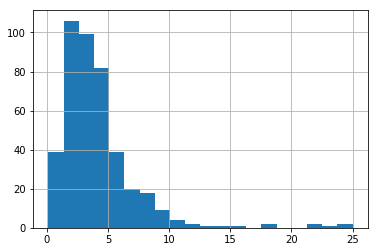

In [199]:
df.wage.hist(bins=20)

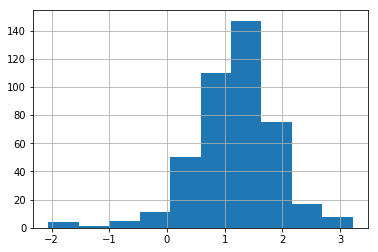

In [200]:
df["lwage"].hist()

### On constate que la distribution des probabilités en log s'approche d'une gaussienne. La gaussienne étant une loi connue théoriquement, il sera donc probablement plus judicieux de chercher à modéliser le log du salaire.

### 4.Calculer les corrélations motheduc et fatheduc. Commentez. Il y a-t-il un problème de multicollinéarité si l'on utilise ces variables comme variables explicatives ?

In [201]:
df[["motheduc", "fatheduc"]].corr()

,motheduc,fatheduc
motheduc,1.000000,0.554063
fatheduc,0.554063,1.000000


### On trouve une corrélation non nulle entre ces deux variables. Cependant la corrélation est loin de 1, ce qui montre que ces variables ne sont pas colinéaires. On n'aura donc pas de problème de multicolinéarité en utilisant ces deux variables comme variables explicatives/

In [202]:
np.linalg.det((df.values.T@df.values))

7.637791617090378e+86

In [203]:
df[["wage", "educ"]].corr()

,wage,educ
wage,1.000000,0.341954
educ,0.341954,1.000000


In [204]:
df[["wage", "exper"]].corr()

,wage,exper
wage,1.000000,0.054991
exper,0.054991,1.000000


In [205]:
df[["wage", "fatheduc"]].corr()

,wage,fatheduc
wage,1.000000,0.107736
fatheduc,0.107736,1.000000


### 5. Faites un graphique en nuage de point entre wage et educ, wage et exper, wage et fatheduc. Commentez. S'agit-il d'un effet "toute chose étant égale par ailleurs ?"

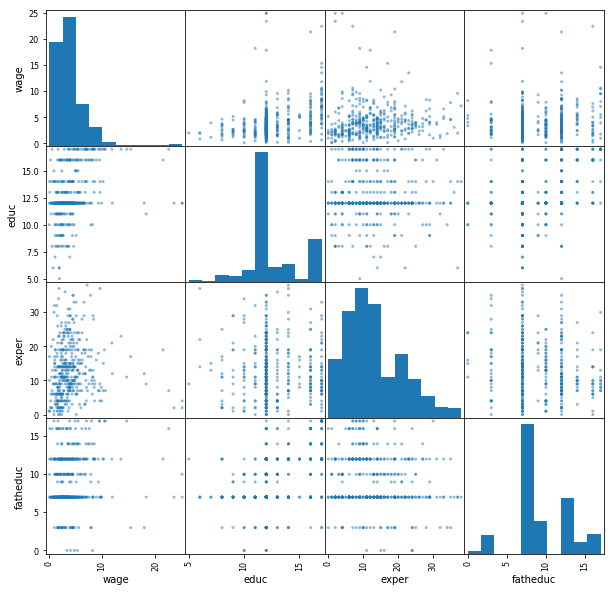

In [206]:
pd.plotting.scatter_matrix(df.loc[:,["wage","educ","exper","fatheduc"]],  figsize=(10,10))[0,0]

### On voit dans ces graphes que les variables wage et educ, wage et exper, wage et fatheduc sont faiblement corrélées. On ne constate donc pas d'influence de paramètres sur wage toutes choses égales par ailleurs

### 6. Quelle est l'hypothèse fondamentale qui garanti des estimateurs non biaisés ? Expliquer le biais de variable omise

### L'hypothèse fondamentale est que les résidus doivent avoir une espérance nulle, et plus encore une espérance nulle quelle que soit une valeur arbitrairement fixée des variables explicatives. Le biais d'une variable omise est la différence de biais entre l'estimateur qui prend en compte toute les variables pertinentes et le biais de celui qui les prend toutes sauf la variable considérée.

## 7. Faire la régression de wage en utilisant les variables explicatives un constante, city, educ, exper, nwifeinc, kidslt6, kidsgt6. Commentez l'histogramme des résidus.

In [207]:
X = df[["city","educ","exper","nwifeinc","kidslt6","kidsge6"]].values

y = df["wage"]

In [208]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)
reg.score(X,y)

0.1272136506162801

In [209]:
residus = y - reg.predict(X)

In [210]:
np.mean(residus)

2.9571360936277534e-16

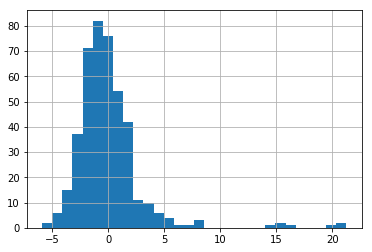

In [211]:
residus.hist(bins = 30)

###  L'histogramme des résidus est centré, mais asymétrique

### 8. Faire la régression de lwage sur une constante, city, educ, exper, nwifeinc, kidslt6, kidsgt6. Comparer l’histogramme obtenu à celui de la question 7.

In [212]:
y = df["lwage"]

reg.fit(X,y)
reg.score(X,y)
residus = y - reg.predict(X)

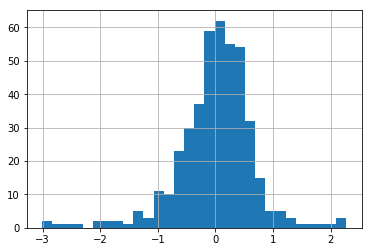

In [213]:
residus.hist(bins = 30)

###  L'histogramme des résidus est centré, et symétrique

### 9. Tester l'hypothèse de non significativité de exper avec un seuil de significativité de 1%, 5% et 10% (test alternatif des deux côtés). Commentez les p-values

In [214]:
Beta = reg.coef_[2]
print("le coefficient de regression de exper est {}".format(Beta))

le coefficient de regression de exper est 0.015487872095843281


In [215]:
Var = m.sqrt((1/(len(y)- X.shape[1] - 1)) * np.linalg.norm(y - reg.predict(X))**2)
print("la variance empirique est {}".format(Var))

la variance empirique est 0.6692960463107634


In [216]:
X_intcp = np.hstack((np.ones(X.shape[0]).reshape(428,1),X))
G = np.dot(np.transpose(X_intcp),X_intcp)

In [217]:
from scipy import stats


VarStudent = stats.t 

pvalue = 2*VarStudent.sf(Beta/(Var*m.sqrt(np.linalg.inv(G)[3,3])),len(y)-X.shape[1])
pvalue

0.0006132275547283399

In [218]:
print("valeur de la statistique : {}".format(Beta/(Var*m.sqrt(np.linalg.inv(G)[3,3]))))

valeur de la statistique : 3.4517182808127638


In [59]:
t_student1 = VarStudent.ppf(1-0.01/2,df=df.shape[0]-7)
print("quantile de Student à 1% : ", t_student1)
t_student5 = VarStudent.ppf(1-0.05/2,df=df.shape[0]-7)
print("quantile de Student à 5% : ", t_student5)
t_student10 = VarStudent.ppf(1-0.1/2,df=df.shape[0]-7)
print("quantile de Student à 10% : ", t_student10)

quantile de Student à 1% :  2.5875575730543354
quantile de Student à 5% :  1.965614792008086
quantile de Student à 10% :  1.6484810571255268


### L hypothèse nulle est donc rejetée quelle que soit le niveau de confiance proposé

### 10. Tester l’hypothèse que le coefficient associé à educ est égal à 10% avec un seuil designificativité de 5% (test à alternatif des deux côtés)

In [60]:
Beta = reg.coef_[1]
print("le coefficient de regression de educ est {}".format(Beta))

le coefficient de regression de educ est 0.1022475478401897


In [61]:
np.abs((Beta - 0.1)/(Var*m.sqrt(np.linalg.inv(G)[2,2])))

0.14882666468787395

### hypothese  non rejetée (valeur très inférieur à tous les quantiles calculés précédemment)


### 11. Tester l’hypothèse jointe que le rendement de l’éducation est de 10% et que celui de l’expérience professionnelle est de 5%


Rappelons ici que : X = df[["city","educ","exper","nwifeinc","kidslt6","kidsge6"]].values

y = df["wage"]

le coefficient de educ est donc 0.1022 et celui de exper 0.015

Testons l'hypothèse jointe que le coeff de educ est 0.10 et celui de exper est 0.05

Commençons par calculer les résidus non contraints

In [63]:
Coeffs = np.hstack((reg.intercept_,reg.coef_))

In [64]:
res_u =y - X_intcp@Coeffs

On calcule ensuite les résidus contraints en faisant une regression sur les observations auxquelles on retranche la pente educ et exper avec les valeurs 0.10 et 0.05

In [110]:
y_cstr = y - 0.1*X_intcp[:,2] - 0.05*X_intcp[:,3]

In [111]:
X_cstr = X_intcp[:,[0,1,4,5,6]]

In [112]:
reg.fit(X_cstr,y_cstr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [113]:
res_cstr = y_cstr - reg.predict(X_cstr)

In [114]:
SSR_u = np.linalg.norm(res_u)**2

SSR_cstr = np.linalg.norm(res_cstr)**2

q = 2

n_k = X_intcp.shape[0] - X_intcp.shape[1] -1

F = n_k*(SSR_cstr - SSR_u)/(q*SSR_u)

In [115]:
F

29.510489549026293

In [116]:
Var_Fisher = stats.f

In [117]:
Var_Fisher.ppf(1-0.01/2,q,n_k)

5.365721536281929

### On rejette donc cette hypothèse jointe. On peut se demander s'il n'y a pas une erreur dans l'énoncé, en effet il serait beaucoup plus logique de tester l'hypothèse jointe avec le coefficient de exper de 0.015 et non pas 0.05 car on rappelle que la regression trouve une valeur de .01548787 pour ce coefficient. Si l'on refait ce test avec cette valeur d hypothèse jointe, on tombe sur le fait que cette hypothèse jointe n'est pas rejetée.

### 12. De combien augmente le salaire en pourcentage avec 10 années d’expérience ?

### D'après le modèle, le coefficients de exper (le nombre d'années d'expériences est de 0.015) pour 10 ans d'expérience supplémentaire, le salaire augmente donc de 15%

### 13. Tester l’égalité des coefficients associés aux variables kidsgt6 et kidslt6. Interprétez.


On va construire des nouvelles variables : la variable kidsgt6 - kidslt6 et les variables kidsgt6 + kidslt6

In [89]:
X_intcp_bis = X_intcp.copy()

kidslt6 = X_intcp_bis[:,5] 
kidsge6 = X_intcp_bis[:,6] 

X_intcp_bis[:,5] = kidslt6 - kidsge6
X_intcp_bis[:,6] = kidslt6 + kidsge6

On fait ensuite une régression linéaire sur cette matrice de variables, ainsi qu'un test de nullité sur le coefficient 5

In [92]:
reg = LinearRegression(fit_intercept= False)
reg.fit(X_intcp_bis,y)
reg.coef_

array([-0.39897523,  0.03526789,  0.10224755,  0.01548787,  0.0048827 ,
        0.01170351, -0.05700638])

In [93]:
G = np.dot(np.transpose(X_intcp_bis),X_intcp_bis)
Beta = reg.coef_[5]
Var = m.sqrt((1/(len(y)- X_intcp_bis.shape[1] - 1)) * np.linalg.norm(y - reg.predict(X_intcp_bis))**2)
VarStudent = stats.t
Beta/(Var*m.sqrt(np.linalg.inv(G)[5,5]))

0.4338415772420891

In [94]:
t_student1 = VarStudent.ppf(1-0.01/2,df=df.shape[0]-7)
print("quantile de Student à 1% : ", t_student1)
t_student5 = VarStudent.ppf(1-0.05/2,df=df.shape[0]-7)
print("quantile de Student à 5% : ", t_student5)
t_student10 = VarStudent.ppf(1-0.1/2,df=df.shape[0]-7)
print("quantile de Student à 10% : ", t_student10)

quantile de Student à 1% :  2.5875575730543354
quantile de Student à 5% :  1.965614792008086
quantile de Student à 10% :  1.6484810571255268


### L'hypothèse nulle sur le coefficient qui corrrespond  à kidslt6 - kidsge6 n'est donc pas rejetée, on a donc non rejet de l'hypothèse d'égalité des deux coefficients.

### 14. En utilisant le modèle de la question 7, faire le test d'hétéroscédasticité de forme linéaire en donnant la p-valeur. Corriger le problème par rapport à la variable la plus importante en utilisant la méthode des MCG. Comparer les écarts-types des coefficients estimés avec ceux obtenus à la question 7. Commenter.

### Reprenons le modèle de la question 7)

In [219]:
y = df["wage"]

reg = LinearRegression(fit_intercept=False)
reg.fit(X_intcp,y)

u = y - reg.predict(X_intcp)

u_2 = u**2

### Nous allons maintenant tester l'hypothèse jointe que tous les coefficients de la regression de u_2 (sauf l'intercept) sur nos variables sont nuls.

In [121]:
reg.fit(X_intcp,u_2)
SSR_u = np.linalg.norm(u_2 - reg.predict(X_intcp))**2

In [126]:
X_cstr = X_intcp[:,[0]]
reg.fit(X_cstr,u_2)
res_cstr = u_2 - reg.predict(X_cstr)
SSR_cstr = np.linalg.norm(res_cstr)**2

In [127]:
q = 6

n_k = X_intcp.shape[0] - X_intcp.shape[1] -1

F = n_k*(SSR_cstr - SSR_u)/(q*SSR_u)

In [128]:
F

1.5888352210148189

In [130]:
Var_Fisher.ppf(0.95,q,n_k)

2.1201661077594145

### Cette hypothèse n'est pas rejetée, l'hypothèse d'homoscédasticité n'est donc pas rejetée

In [132]:
p_value = 1 - Var_Fisher.cdf(F, 6, n_k)
p_value

0.1487622208170808

### 15. Tester le changement de structure de la question 8 entre les femmes qui ont moins de 30 ans, entre 30 et 43 ans, plus de 43 ans (3 groupes mutuellement exclusifs). Donnez les p-valeurs.


In [133]:
df1 = df[df.age < 30]
df2 = df[(df.age >= 30) & (df.age <= 43)]
df3 = df[df.age > 43]

In [134]:
df1

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq


### Le 1er groupe demandé est vide. Affichons la structure du second groupe

In [135]:
import statsmodels.api as sm

In [140]:
X = sm.add_constant(df2[['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsge6']])
model = sm.OLS(df2.lwage.apply(float), X)
resultats_structure = model.fit()

print(resultats_structure.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     7.888
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           9.37e-08
Time:                        16:21:13   Log-Likelihood:                -248.69
No. Observations:                 242   AIC:                             511.4
Df Residuals:                     235   BIC:                             535.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5412      0.318     -1.702      0.0

### Affichons maintenant les p-valeurs pour ce groupe

In [142]:
print(resultats_structure.pvalues)

const       9.012661e-02
city        3.584252e-01
educ        9.375604e-07
exper       1.173559e-02
nwifeinc    5.991599e-01
kidslt6     3.212302e-01
kidsge6     5.211483e-01
dtype: float64


### Recommençons la même chose pour le 3e groupe

In [145]:
X = sm.add_constant(df3[['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsge6']])
model = sm.OLS(df3.lwage.apply(float), X)
resultats_structure = model.fit()

print(resultats_structure.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     5.925
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           1.15e-05
Time:                        16:24:45   Log-Likelihood:                -179.89
No. Observations:                 186   AIC:                             373.8
Df Residuals:                     179   BIC:                             396.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3232      0.276     -1.173      0.2

In [146]:
print(resultats_structure.pvalues)

const       0.242448
city        0.864526
educ        0.000038
exper       0.002665
nwifeinc    0.051898
kidslt6     0.978104
kidsge6     0.627090
dtype: float64


### 16. A partir de la variable kidslt6, créer un ensemble de variables binaires pour le nombre d’enfants de moins de 6 ans. Refaire la question 8 avec ces variables et en utilisant comme référence les femmes qui ont des enfants de plus de 6 ans. Ces catégories sont-elles mutuellement exclusives ? Interprétez les paramètres associés aux variables binaires. Faire le test de non significativité de l’ensemble des variables binaires. Donnez les p-valeurs

In [156]:
for i in range(0, df.kidslt6.max()+1):
    category = 'kidslt6_bin' + str(i)
    df[category] = df.kidslt6.apply(lambda x: float(x == i))

In [157]:
# On fait la distinction entre les deux groupes
df1 = df[df.kidsge6 > 0]
df2 = df[df.kidsge6 == 0]

In [159]:
df1.kidslt6_bin1[2]

1.0

### On constate que ces catégories ne sont pas mutuellement exclusives, on voit ci-dessus que l'on peut en effet trouver des femmes ayant des enfants de moins de 6 ans parmi celles qui ont des enfants de plus de 6 ans

### On va désormais effectuer une régression, mais seulement sur kidslt6_bin1 et kidslt6_bin2 car les autres variables regroupent des ensembles complémentaires, ce qui créerait des problèmes de collinéarité

In [162]:
X = sm.add_constant(df1[['city', 'educ', 'exper', 'nwifeinc', 'kidsge6', 'kidslt6_bin1', 'kidslt6_bin2']])
model = sm.OLS(df1.lwage.apply(float), X)
resultats_structure = model.fit()

print(resultats_structure.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     5.666
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           4.02e-06
Time:                        16:44:22   Log-Likelihood:                -292.12
No. Observations:                 279   AIC:                             600.2
Df Residuals:                     271   BIC:                             629.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.2761      0.298     -0.927   

### On constate que les coefficient des variables kidslt6_bin1 (un enfant de moins de 6 ans) et kidslt6_bin2 (deux enfants de moins de 6 ans) sont négatifs. Ceci montre que le fait d'avoir un enfant de moins de 6 ans a des conséquences négatives sur le salaire des femmes. C'est encore pire si l'on en a deux.



### Faisons maintenant les tests de significativité

In [166]:

VarStudent.ppf(1 - 0.05/2, X.shape[0]-8)

1.9687563138227426

In [171]:
resultats_structure.tvalues['kidslt6_bin1']

-0.6855317536096535

In [172]:
resultats_structure.tvalues['kidslt6_bin2']

-0.4336783419071868

### On ne rejette pas l'hypothèse nulle pour aucune des deux variables à 5%

### Donnons maintenant les p valeurs associées à ces deux variables binaires

In [174]:
resultats_structure.pvalues['kidslt6_bin1']

0.49359442414806287

In [175]:
resultats_structure.pvalues['kidslt6_bin2']

0.6648670588510202

### 17. A partir de l’échantillon global, faire une régression de inlf sur une constante, city, educ, age, kidslt6, kidsgt6. Interprétez les coefficients estimés.

In [179]:
df = pd.read_csv('MROZ.raw', sep='\s+', names=names, na_values=".")

In [180]:
X = sm.add_constant(df[['city', 'educ',  'age', 'kidslt6', 'kidsge6']])
model = sm.OLS(df.inlf, X)
res = model.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   inlf   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     21.20
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           7.29e-20
Time:                        17:05:19   Log-Likelihood:                -489.44
No. Observations:                 753   AIC:                             990.9
Df Residuals:                     747   BIC:                             1019.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7076      0.162      4.365      0.0

### Les données de la régression permettent de conclure que l'éducation facilite  l'appartenance à la catégorie 'inlf' alors que les enfants et l'âge rendent cela plus difficile. En outre, avoir des enfants de moins de 6 ans est plus pénalisant que d'avoir ds enfants de plus de 6 ans. Enfin, habiter en zone métropolitaine semble légèrement pénalisant.

### 18. Estimer le modèle probit de inlf sur une constante, city, educ, age, kidslt6, kidsgt6. Faire le test de non significativité jointes des coefficients associés à kidslt6 et à kidsgt6. Comparez le résultat du test à celuir de la question 18

In [182]:
model = sm.Probit(df.inlf, X)
resultats_probit = model.fit()

print(resultats_probit.summary())

Optimization terminated successfully.
         Current function value: 0.617205
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:                   inlf   No. Observations:                  753
Model:                         Probit   Df Residuals:                      747
Method:                           MLE   Df Model:                            5
Date:                Sun, 28 Apr 2019   Pseudo R-squ.:                 0.09734
Time:                        17:07:23   Log-Likelihood:                -464.76
converged:                       True   LL-Null:                       -514.87
                                        LLR p-value:                 4.714e-20
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6050      0.467      1.297      0.195      -0.309       1.520
city          -0.0863      0.

### Faisons le test de significativité pour l'hypothèse jointe de nullité des coefficients associés à kidslt6 et à kidsgt6

In [186]:
H0 = '(kidslt6 = 0),(kidsge6 = 0)' 
resultats_probit.f_test(H0).fvalue[0][0]

31.12849841574522

In [187]:
Var_Fisher.ppf(0.95, 2, n_k)

3.017201890179232

### L'hypothèse jointe est rejetée

### Le fait d'avoir un enfant, quel que soit son âge, a une influence non négligeable